D:\OneDrive - Cardiff University\05 - Python\13 - ABM
D:
OneDrive - Cardiff University
05 - Python
13 - ABM
D:\


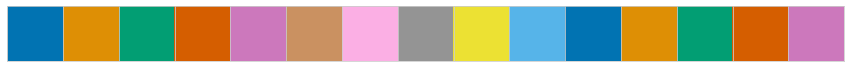

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "png"
dpi = 1000
figsize = (12, 3.5)
figsize_map = (10, 6)
sns.palplot(sns.color_palette())

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

In [2]:
path_results = r'D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\Results_for_notebooks'

df = pd.read_csv(path_results+os.path.sep+"resultsSouthWales.csv", index_col=0)
df["Year"] = pd.to_datetime(df["Year"], format='%Y')


path_input_data = r'D:\OneDrive - Cardiff University\04 - Projects\18 - ABM\01 - Code\ABM_MISSION\ResidentialHeatSectorData'
file = "fuel_prices.csv"
dfFuelPrices = pd.read_csv(path_input_data+os.path.sep+file, index_col=0)
dfFuelPrices.columns = dfFuelPrices.columns.astype(int)
dfFuelPrices = dfFuelPrices.T
dfFuelPrices.index = pd.to_datetime(dfFuelPrices.index, format='%Y')

df.head()

,Year,Heating_system,Dwelling_type,EPC_rating,Number_of_unit,Cumulative_cost_[£],Cumulative_incentives_[£],Heat_demand_[kWh]
0,2018-01-01,Biomass boiler,Detached house,39.0,6279,1.934378e+07,0.000000,179372193
1,2018-01-01,Biomass boiler,Detached house,70.0,571,3.800897e+06,0.000000,9506008
2,2018-01-01,Biomass boiler,Flat,50.0,671,1.212877e+06,0.000000,5489451
3,2018-01-01,Biomass boiler,Flat,67.0,42,1.435427e+05,862.751212,220584
4,2018-01-01,Biomass boiler,Semi-detached house,45.0,6931,1.481170e+07,0.000000,93402156


In [3]:
df

,Year,Heating_system,Dwelling_type,EPC_rating,Number_of_unit,Cumulative_cost_[£],Cumulative_incentives_[£],Heat_demand_[kWh]
0,2018-01-01,Biomass boiler,Detached house,39.0,6279,1.934378e+07,0.000000,179372193
1,2018-01-01,Biomass boiler,Detached house,70.0,571,3.800897e+06,0.000000,9506008
2,2018-01-01,Biomass boiler,Flat,50.0,671,1.212877e+06,0.000000,5489451
3,2018-01-01,Biomass boiler,Flat,67.0,42,1.435427e+05,862.751212,220584
4,2018-01-01,Biomass boiler,Semi-detached house,45.0,6931,1.481170e+07,0.000000,93402156
...,...,...,...,...,...,...,...,...
26,2034-01-01,Resistance heating,Detached house,64.0,7113,1.601015e+08,0.000000,43460430
27,2034-01-01,Resistance heating,Semi-detached house,40.0,6664,1.053112e+08,0.000000,46501392
28,2034-01-01,Resistance heating,Semi-detached house,67.0,1423,2.453672e+07,223.282819,6057711
29,2034-01-01,Resistance heating,Terraced house,41.0,1413,2.038737e+07,0.000000,9413406


In [4]:
df["Weighted_EPC_rating"] = df["EPC_rating"]*df["Number_of_unit"]
weighted_EPC = df[["Year", "Heating_system", "Weighted_EPC_rating"]].copy()
weighted_EPC = weighted_EPC.groupby(["Year", "Heating_system"]).sum()
weighted_EPC = pd.merge(weighted_EPC, df.groupby(["Year", "Heating_system"]).sum()["Number_of_unit"].to_frame(), left_index=True, right_index=True, how="left")
weighted_EPC["Weighted_EPC_rating"] = weighted_EPC["Weighted_EPC_rating"]/weighted_EPC["Number_of_unit"]

Year        Dwelling_type      
2018-01-01  Detached house         249558
            Flat                   135715
            Semi-detached house    324909
            Terraced house         311274
2019-01-01  Detached house         249558
                                    ...  
2033-01-01  Terraced house         311274
2034-01-01  Detached house         249558
            Flat                   135715
            Semi-detached house    324909
            Terraced house         311274
Name: Number_of_unit, Length: 68, dtype: int64

Text(0, 0.5, 'Average EPC rating')

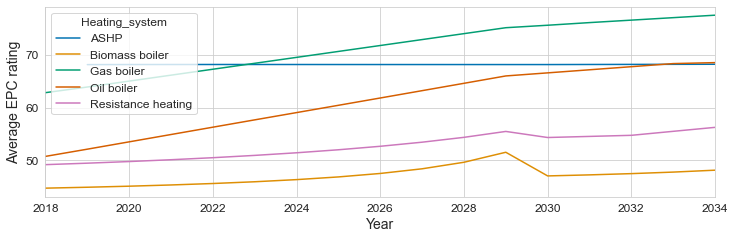

In [5]:
f, ax = plt.subplots(figsize=figsize)
weighted_EPC["Weighted_EPC_rating"].unstack([1]).plot(ax=ax)
ax.margins(0, None)
ax.set_ylabel("Average EPC rating")

In [16]:
weighted_EPC["Weighted_EPC_rating"]

Year        Dwelling_type      
2018-01-01  Detached house         57.934933
            Flat                   64.219062
            Semi-detached house    60.782967
            Terraced house         61.337635
2019-01-01  Detached house         59.195550
                                     ...    
2033-01-01  Terraced house         77.115818
2034-01-01  Detached house         74.005193
            Flat                   71.694971
            Semi-detached house    76.863260
            Terraced house         77.634830
Name: Weighted_EPC_rating, Length: 68, dtype: float64

In [6]:
df["Weighted_EPC_rating"] = df["EPC_rating"]*df["Number_of_unit"]
weighted_EPC = df[["Year", "Dwelling_type", "Weighted_EPC_rating"]].copy()
weighted_EPC = weighted_EPC.groupby(["Year", "Dwelling_type"]).sum()
weighted_EPC = pd.merge(weighted_EPC, df.groupby(["Year", "Dwelling_type"]).sum()["Number_of_unit"].to_frame(), left_index=True, right_index=True, how="left")
weighted_EPC["Weighted_EPC_rating"] = weighted_EPC["Weighted_EPC_rating"]/weighted_EPC["Number_of_unit"]

Text(0, 0.5, 'Average EPC rating')

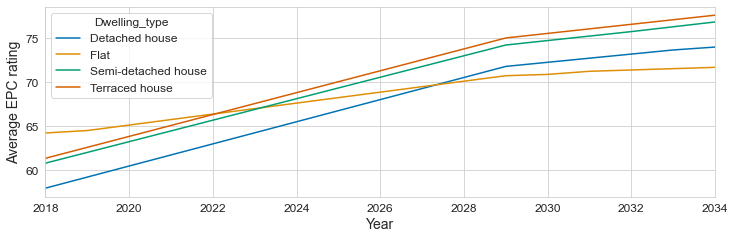

In [7]:
f, ax = plt.subplots(figsize=figsize)
weighted_EPC["Weighted_EPC_rating"].unstack([1]).plot(ax=ax)
ax.margins(0, None)
ax.set_ylabel("Average EPC rating")

Text(0, 0.5, 'Number of units')

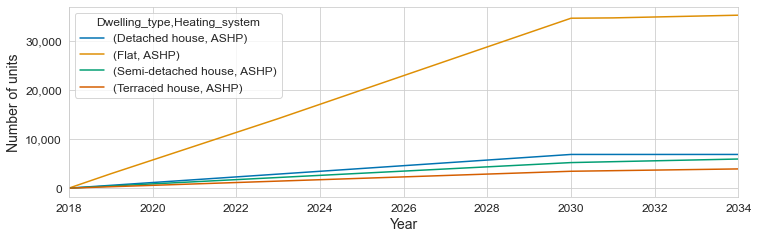

In [8]:
f, ax = plt.subplots(figsize=figsize)
idx = pd.IndexSlice
df_to_plot = df.groupby(["Year", "Dwelling_type", "Heating_system"]).sum()["Number_of_unit"].unstack([1,2])
df_to_plot.fillna(0, inplace=True)
df_to_plot.loc[:, idx[:, ["ASHP", "GSHP"]]].plot(ax=ax)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.margins(0, None)
ax.set_ylabel("Number of units")

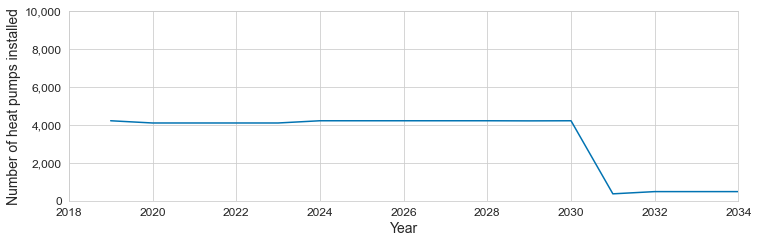

In [9]:
f, ax = plt.subplots(figsize=figsize)
(df_to_plot.loc[:, idx[:, ["ASHP", "GSHP"]]].sum(axis=1)-df_to_plot.loc[:, idx[:, ["ASHP", "GSHP"]]].sum(axis=1).shift()).plot(ax=ax)
ax.set_ylim(0,10000)
ax.set_ylabel("Number of heat pumps installed")
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))

Text(0, 0.5, 'Number of units')

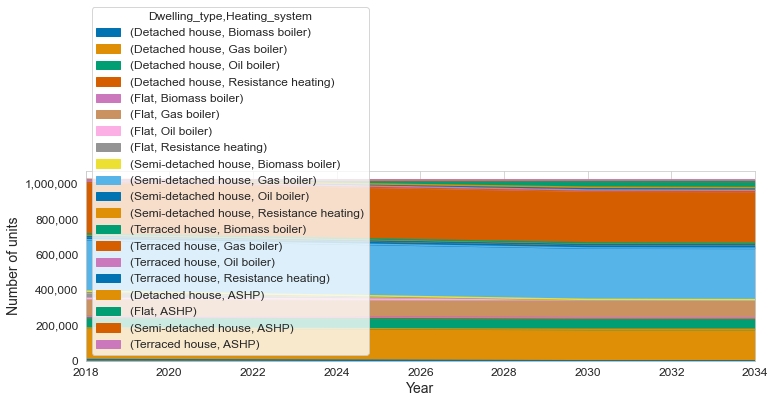

In [10]:
f, ax = plt.subplots(figsize=figsize)
df.groupby(["Year", "Dwelling_type", "Heating_system"]).sum()["Number_of_unit"].unstack([1,2]).plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
ax.set_ylabel("Number of units")

In [11]:
df.groupby(["Year"]).sum()["Heat_demand_[kWh]"]

Year
2018-01-01    15373945349
2019-01-01    15091561936
2020-01-01    14796317459
2021-01-01    14501072982
2022-01-01    14205828505
2023-01-01    13910584028
2024-01-01    13615339551
2025-01-01    13320095074
2026-01-01    13024850597
2027-01-01    12729606120
2028-01-01    12434402318
2029-01-01    12139157841
2030-01-01    12021250993
2031-01-01    11895841493
2032-01-01    11777934645
2033-01-01    11658732601
2034-01-01    11554863866
Name: Heat_demand_[kWh], dtype: int64

Text(0, 0.5, 'Heat demand [kWh]')

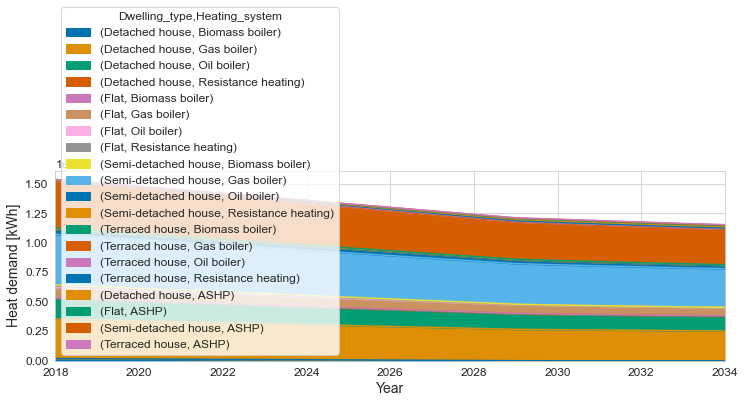

In [12]:
f, ax = plt.subplots(figsize=figsize)
df.groupby(["Year", "Dwelling_type", "Heating_system"]).sum()["Heat_demand_[kWh]"].unstack([1,2]).plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Heat demand [kWh]")

Text(0, 0.5, 'Cumulative_incentives_[£]')

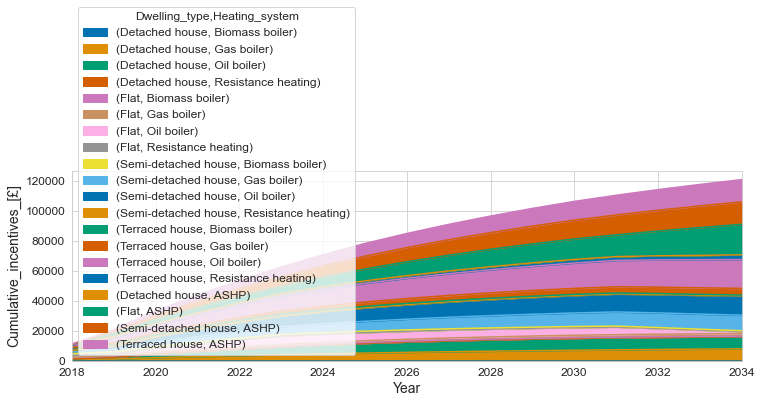

In [13]:
f, ax = plt.subplots(figsize=figsize)
df.groupby(["Year", "Dwelling_type", "Heating_system"]).sum()["Cumulative_incentives_[£]"].unstack([1,2]).plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Cumulative_incentives_[£]")

Text(0, 0.5, 'Cumulative_cost_[£]')

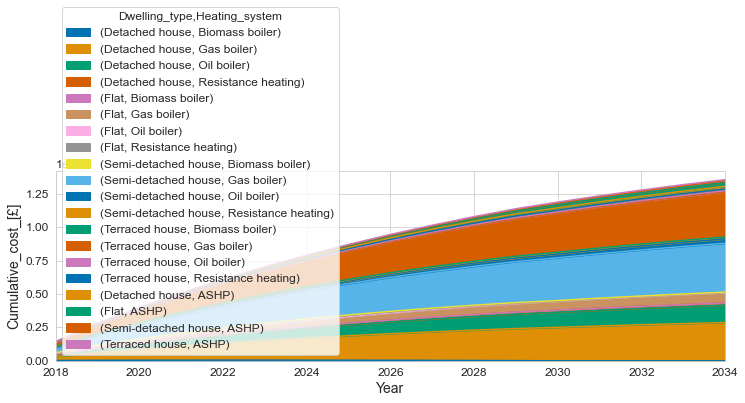

In [14]:
f, ax = plt.subplots(figsize=figsize)
df.groupby(["Year", "Dwelling_type", "Heating_system"]).sum()["Cumulative_cost_[£]"].unstack([1,2]).plot.area(stacked=True, ax=ax)
ax.margins(0, None)
ax.set_ylabel("Cumulative_cost_[£]")

Text(0, 0.5, 'Fuel price [p/kWh]')

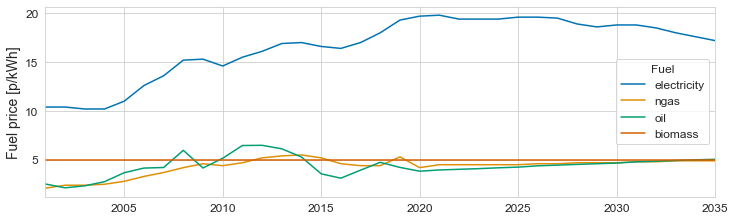

In [15]:
f, ax = plt.subplots(figsize=figsize)
dfFuelPrices.plot(ax=ax)
ax.set_ylabel("Fuel price [p/kWh]")